# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from keras.models import Sequential
from keras.layers import Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.metrics import sparse_categorical_crossentropy
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Data Preprocessing

## Reading in Image Directories for both train and test

In [3]:
train_dataframe = pd.read_csv(r'C:\Users\ugoch\Desktop\University of Hull\771763-Understanding Artificial Intelligence\week 9\Emergence_vehicle_dataset\Emergency_Vehicles\train.csv')
test_dataframe = pd.read_csv(r'C:\Users\ugoch\Desktop\University of Hull\771763-Understanding Artificial Intelligence\week 9\Emergence_vehicle_dataset\Emergency_Vehicles\test.csv')

In [4]:
train = r'C:\Users\ugoch\Desktop\University of Hull\771763-Understanding Artificial Intelligence\week 9\Emergence_vehicle_dataset\Emergency_Vehicles\train'
test = r'C:\Users\ugoch\Desktop\University of Hull\771763-Understanding Artificial Intelligence\week 9\Emergence_vehicle_dataset\Emergency_Vehicles\test'

## Data Overview

In [5]:
#Changing data type to strings
train_dataframe['emergency_or_not'] = train_dataframe['emergency_or_not'].astype(str)
test_dataframe['emergency_or_not'] = test_dataframe['emergency_or_not'].astype(str)
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [2]:
# train_dataframe

In [1]:
# test_dataframe

## Viewing Image

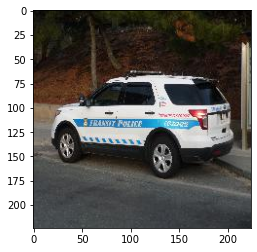

In [8]:
image = cv2.imread(r'C:\Users\ugoch\Desktop\University of Hull\771763-Understanding Artificial Intelligence\week 9\Emergence_vehicle_dataset\Emergency_Vehicles\train\1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [9]:
image.shape

(224, 224, 3)

In [10]:
#transforming images
image_generator = ImageDataGenerator(rotation_range = 20,
                                    height_shift_range = 0.1,
                                    width_shift_range = 0.1,
                                    shear_range = 0.20,
                                    zoom_range = 0.20,
                                    fill_mode = 'nearest',
                                    horizontal_flip = True,
                                    rescale = 1/255,
                                    validation_split = 0.3)

Text(0.5, 1.0, 'Train Image 1')

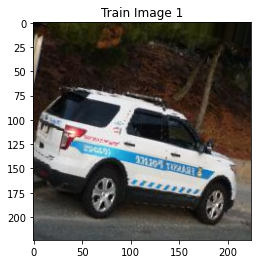

In [11]:
#showing image 1
plt.imshow(image_generator.random_transform(image))
plt.title('Train Image 1')

## Splitting into train and validation 

In [12]:
train_data_gen = image_generator.flow_from_dataframe(dataframe=train_dataframe,
                                                     directory=train,
                                                     x_col = 'image_names',
                                                     y_col = 'emergency_or_not',
                                                     class_mode = 'binary',
                                                     subset='training',
                                                     target_size = (224, 224),
                                                     batch_size = 50)

test_data_gen = image_generator.flow_from_dataframe(dataframe=test_dataframe,
                                                    directory=test,
                                                    x_col ='image_names',
                                                    y_col = 'emergency_or_not',
                                                    class_mode = 'binary',
                                                    subset = None,
                                                    target_size = (224, 224),
                                                    batch_size = 50)

validation_data_gen = image_generator.flow_from_dataframe(dataframe=train_dataframe,
                                                         directory=train,
                                                         x_col = 'image_names', 
                                                         y_col = 'emergency_or_not',
                                                         subset = 'validation',
                                                         class_mode = 'binary',
                                                         target_size = (224, 224),
                                                         batch_size = 50)

Found 1153 validated image filenames belonging to 2 classes.
Found 706 validated image filenames belonging to 2 classes.
Found 493 validated image filenames belonging to 2 classes.


# Convolutional Neural Networks

## STEP 1

### Constructor Stage

In [13]:
seq_model = Sequential()    #stacking up layers

#first layer
seq_model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3),activation = 'relu', padding = 'same')) 
seq_model.add(MaxPooling2D(pool_size=(2,2)))   #Selecting the maximum pixel while pooling

seq_model.add(Flatten())    #converts to one dimensional array

seq_model.add(Dense(50, activation = 'relu'))  #hidden layer
seq_model.add(Dropout (0,2))
seq_model.add(Dense(1, activation = 'sigmoid'))#activation function in the output layer

### Compilation Stage

In [14]:
#showing number of parameters taken into considering
seq_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 50)                20070450  
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                        

### Training Stage

In [15]:
#finding a set of weights in the network at a minimum loss
history=seq_model.fit(train_data_gen, epochs = 10, validation_data = validation_data_gen)

Epoch 1/10
24/24 [==============================] - 67s 3s/step - loss: 2.9766 - accuracy: 0.5802 - val_loss: 1.0107 - val_accuracy: 0.5497
Epoch 2/10
24/24 [==============================] - 58s 2s/step - loss: 1.0571 - accuracy: 0.6062 - val_loss: 0.8207 - val_accuracy: 0.6105
Epoch 3/10
24/24 [==============================] - 59s 2s/step - loss: 0.6088 - accuracy: 0.7259 - val_loss: 0.5884 - val_accuracy: 0.7323
Epoch 4/10
24/24 [==============================] - 61s 3s/step - loss: 0.5571 - accuracy: 0.7181 - val_loss: 0.5794 - val_accuracy: 0.7383
Epoch 5/10
24/24 [==============================] - 54s 2s/step - loss: 0.4892 - accuracy: 0.7754 - val_loss: 0.5481 - val_accuracy: 0.7444
Epoch 6/10
24/24 [==============================] - 57s 2s/step - loss: 0.4876 - accuracy: 0.7702 - val_loss: 0.5532 - val_accuracy: 0.7323
Epoch 7/10
24/24 [==============================] - 53s 2s/step - loss: 0.4940 - accuracy: 0.7693 - val_loss: 0.5413 - val_accuracy: 0.7465
Epoch 8/10
24/24 [==

### Checking Overfitting

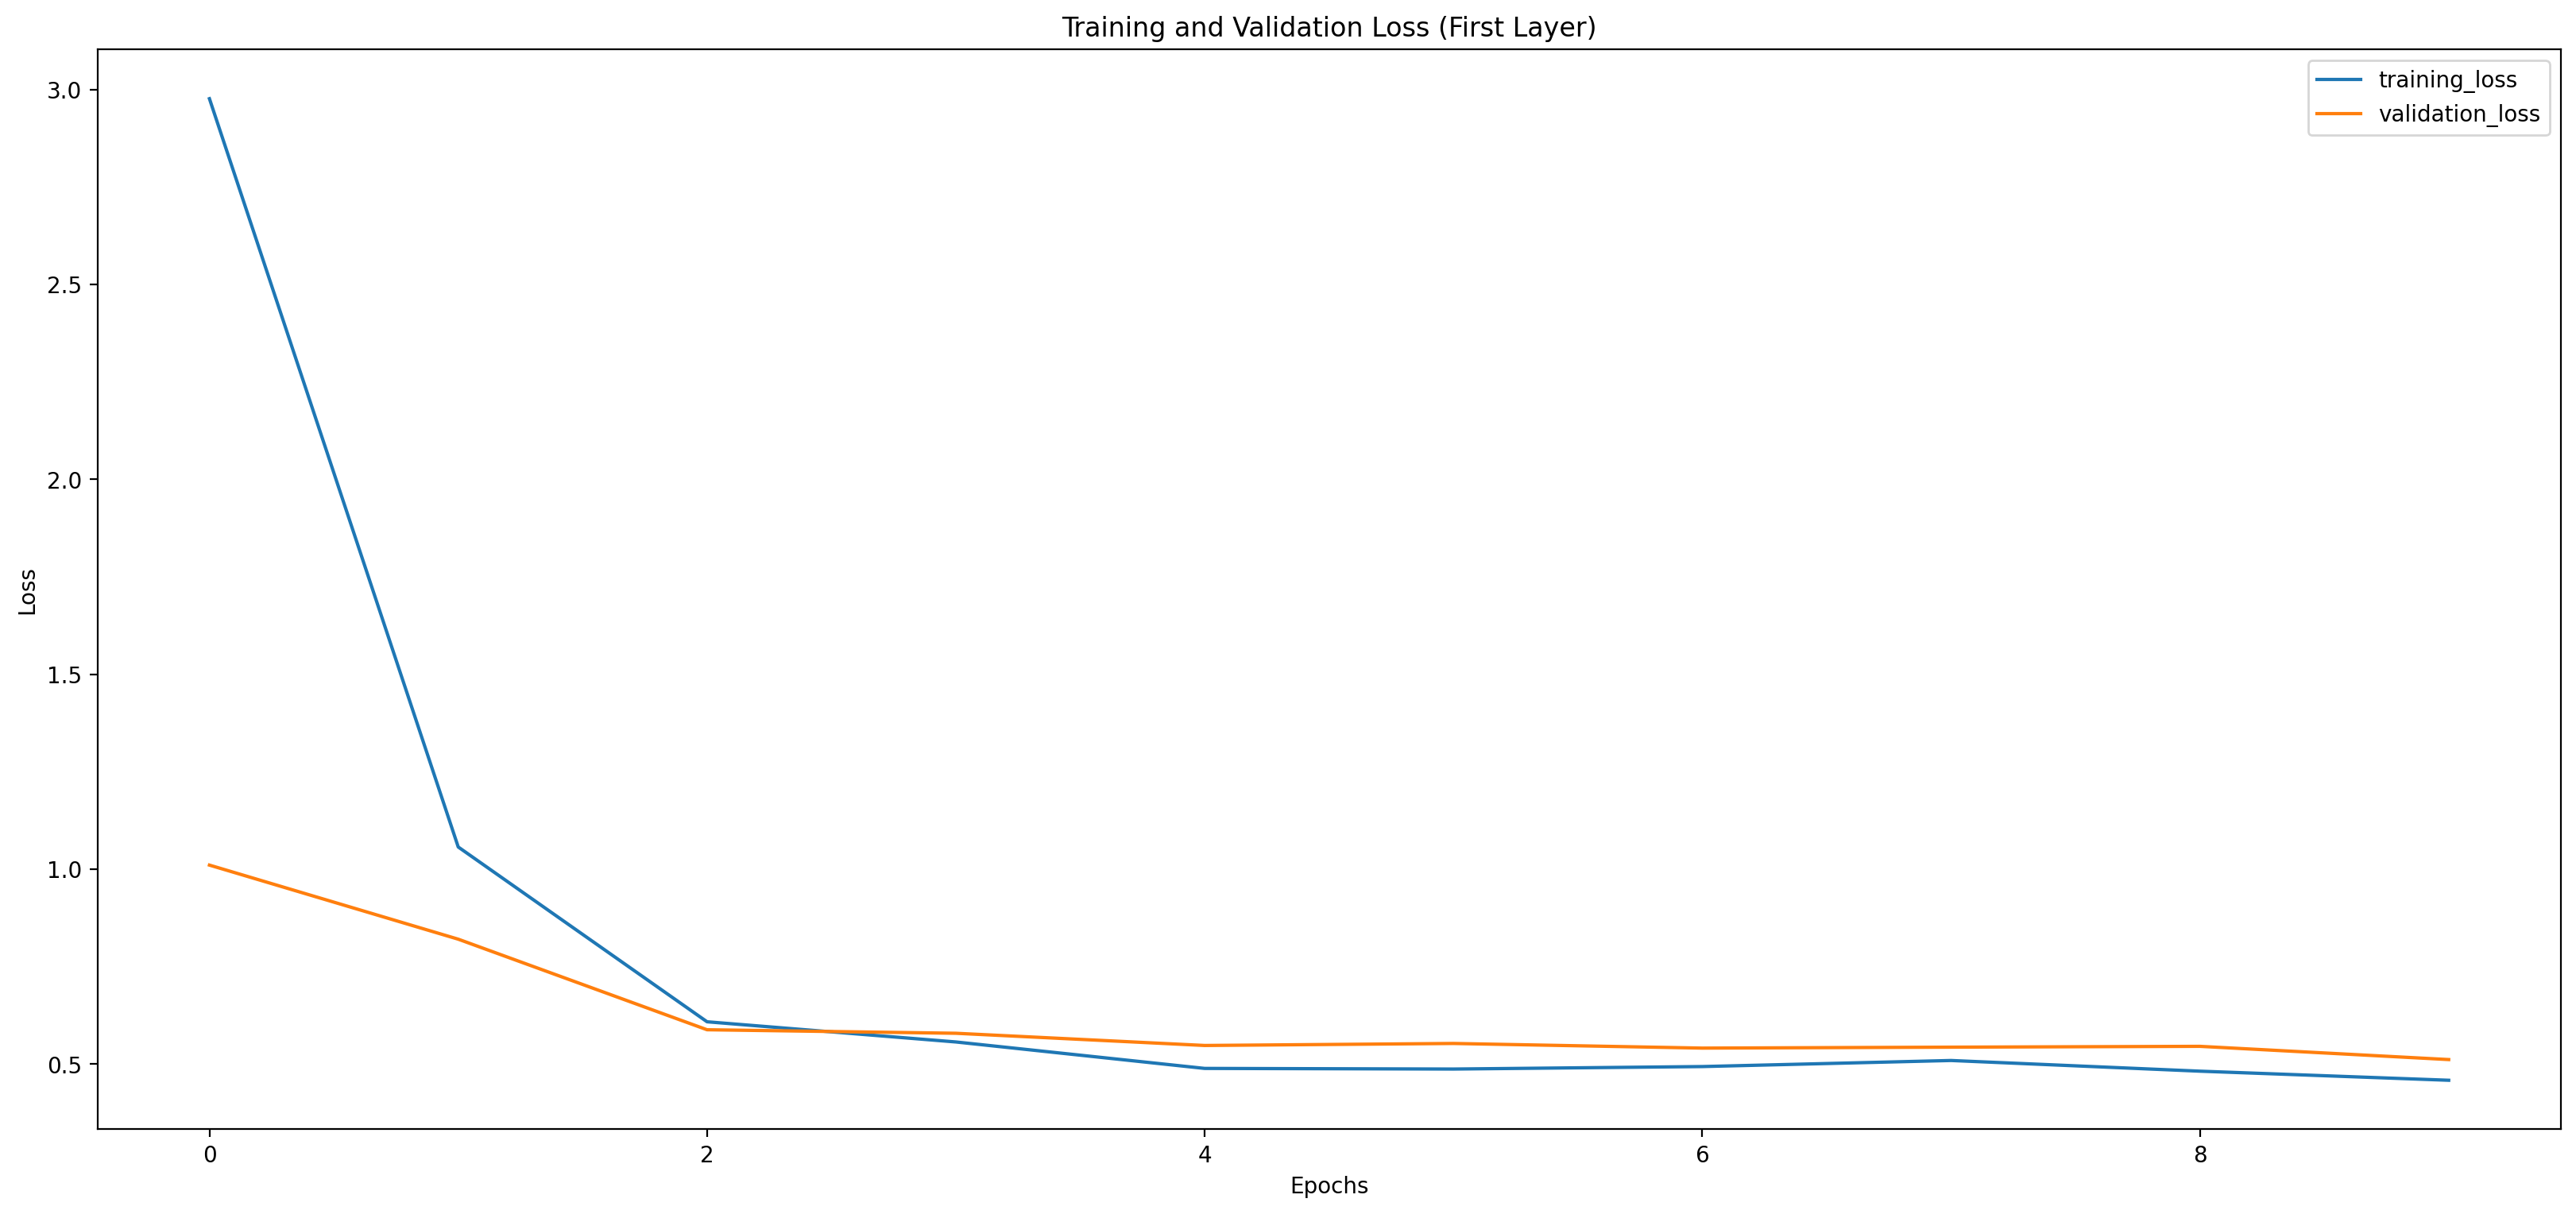

In [16]:
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (20,9))
plt.plot(history_df['loss'], label='training_loss')
plt.plot(history_df['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss (First Layer)', fontsize='12')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

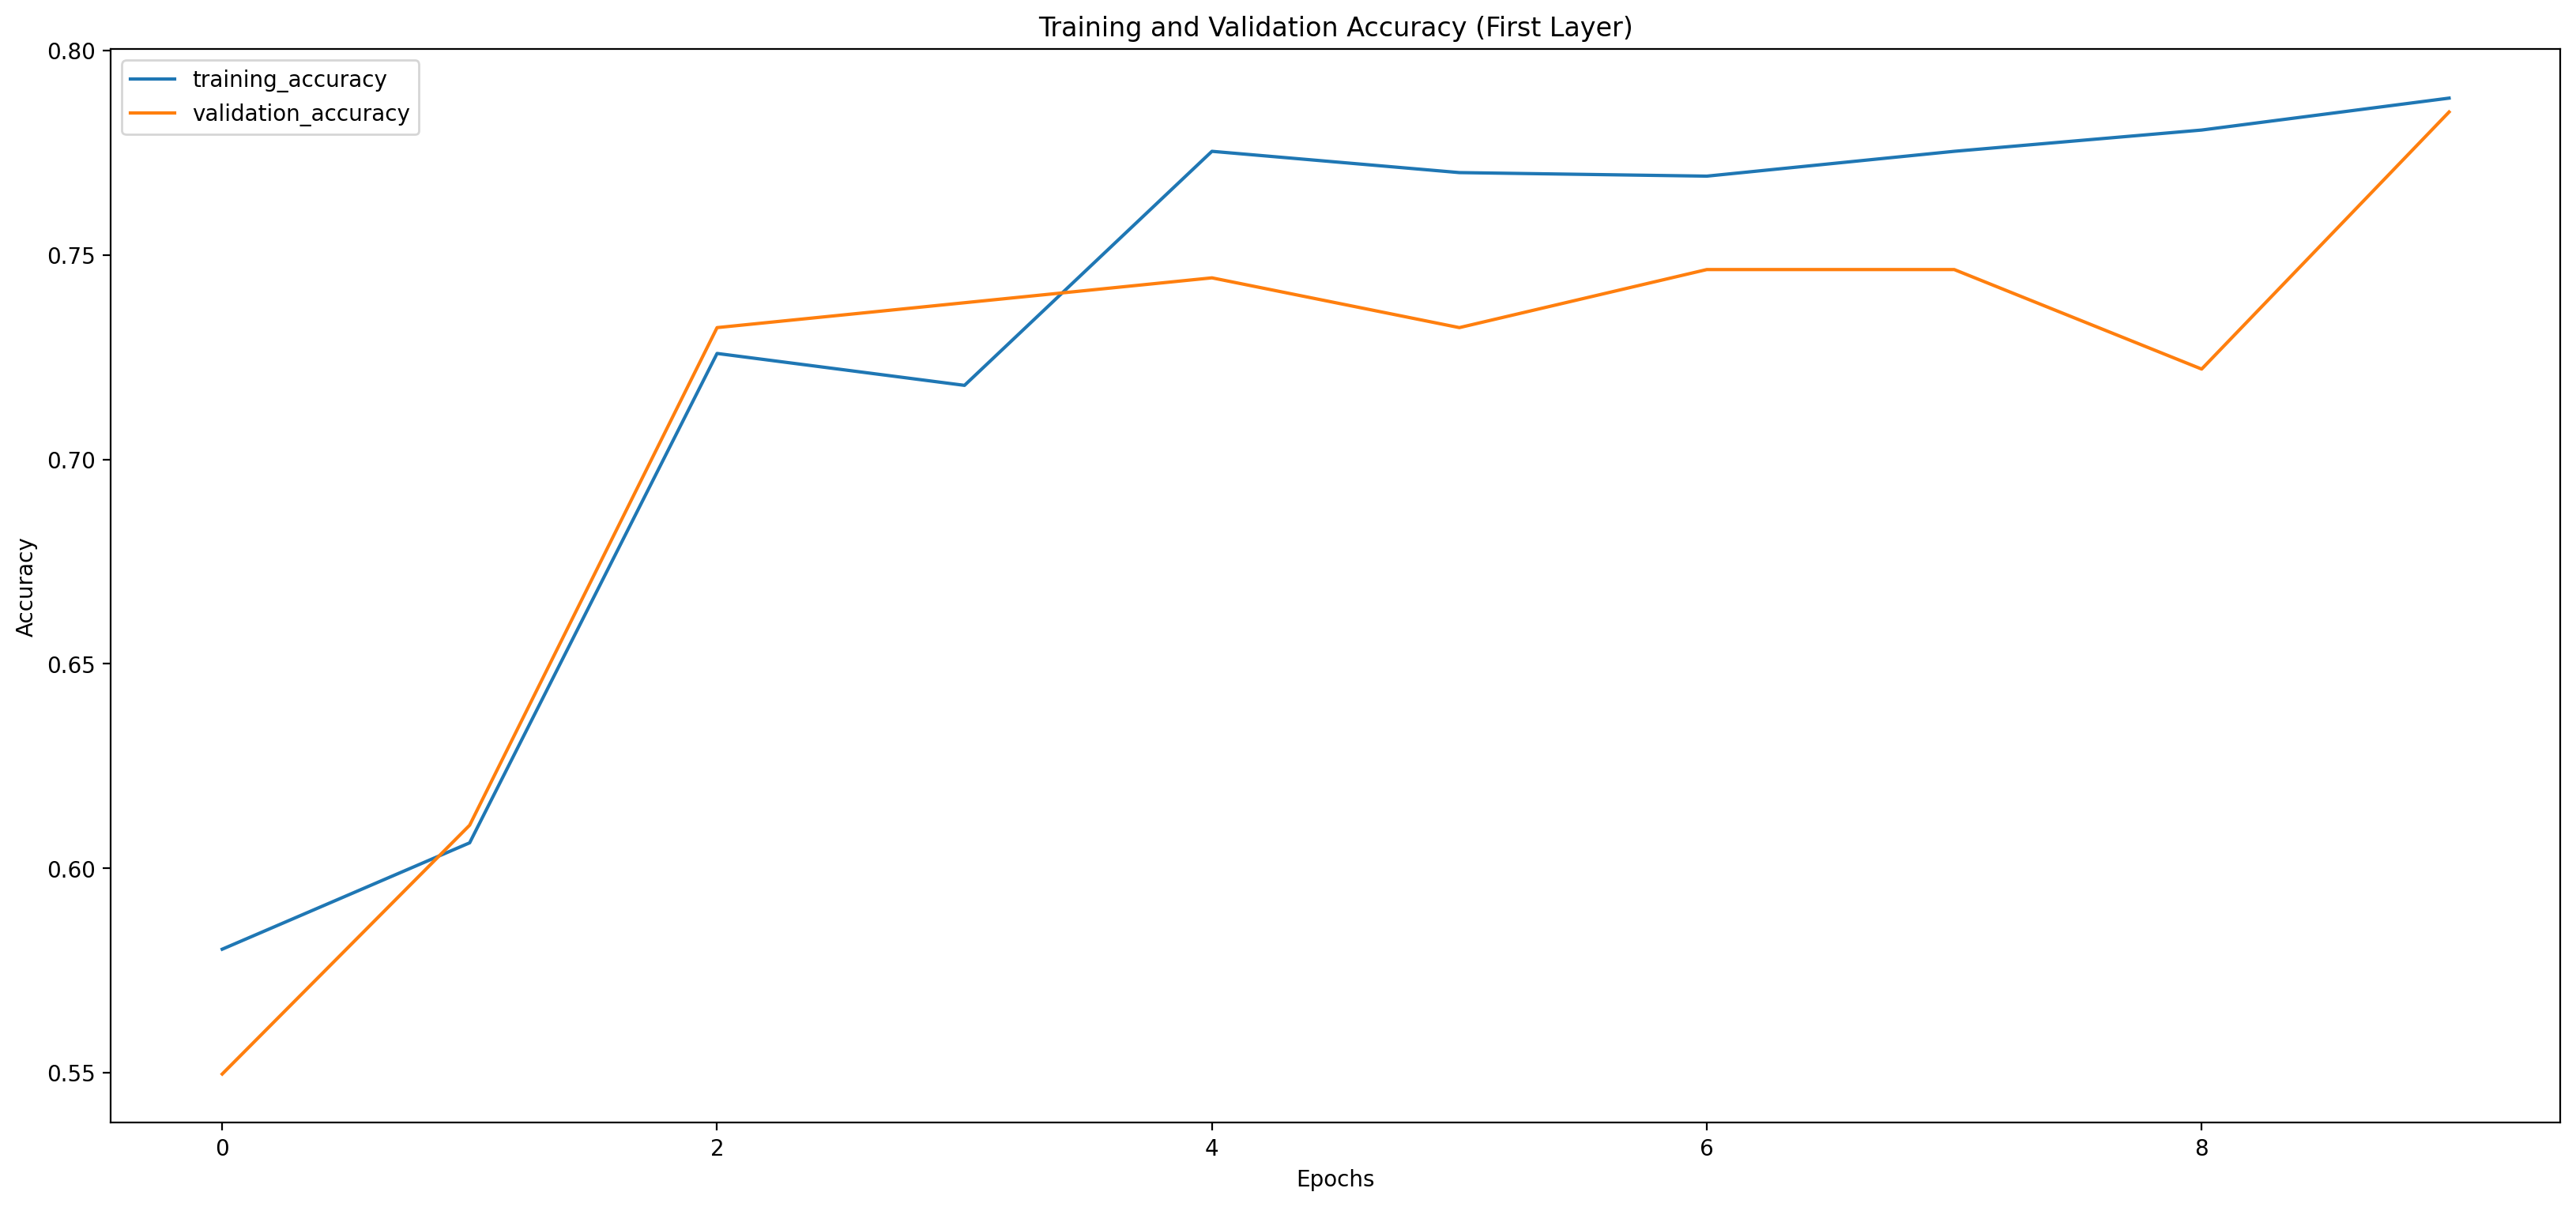

In [17]:
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (20,9))
plt.plot(history_df['accuracy'], label='training_accuracy')
plt.plot(history_df['val_accuracy'], label='validation_accuracy')
plt.title('Training and Validation Accuracy (First Layer)',fontsize='12')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluation Stage

In [18]:
seq_model.evaluate(test_data_gen)

15/15 [==============================] - 19s 1s/step - loss: 0.5056 - accuracy: 0.7748


[0.5056123733520508, 0.7747875452041626]

In [19]:
preds = seq_model.predict(test_data_gen)

15/15 [==============================] - 20s 1s/step


<ipython-input-20-a9580ee04f37>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = (preds < 0.50).astype(np.int).tolist()


<Figure size 3000x4000 with 0 Axes>

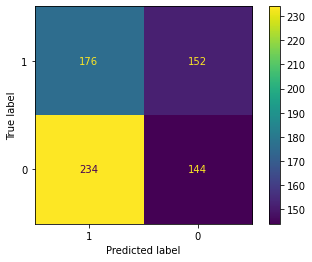

In [20]:
features = (preds < 0.50).astype(np.int).tolist()
features
emergency_predictions = []
for pred in features:
    for predictions in pred:
        emergency_predictions.append(predictions)
        
matrix_ = confusion_matrix(emergency_predictions, list((test_dataframe['emergency_or_not']).astype(int)))

plt.figure(dpi=200, figsize=(15,20))
conf_mat = ConfusionMatrixDisplay(matrix_, display_labels=test_dataframe.emergency_or_not.unique())
conf_mat.plot()

## STEP 2

### Constructor Stage

In [21]:
seq_model = Sequential()

#additional layers for feature extraction
seq_model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3),activation = 'relu', padding = 'same'))
seq_model.add(MaxPooling2D(pool_size=(2,2)))

seq_model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(224,224,3),activation='relu',padding='valid'))
seq_model.add(MaxPooling2D(pool_size=(2,2)))

seq_model.add(Flatten()) #reduce the input to one dimensional array

seq_model.add(Dense(50, activation = 'relu'))
seq_model.add(Dropout (0,2))
seq_model.add(Dense(1, activation = 'sigmoid'))

### Compilation Stage

In [22]:
#transforming the simple sequence layers
seq_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 96800)             0         
                                                                 
 dense_2 (Dense)             (None, 50)               

### Training Stage

In [23]:
history=seq_model.fit(train_data_gen, epochs = 10, validation_data = validation_data_gen)

Epoch 1/10
24/24 [==============================] - 70s 3s/step - loss: 0.9299 - accuracy: 0.5594 - val_loss: 0.6462 - val_accuracy: 0.6694
Epoch 2/10
24/24 [==============================] - 65s 3s/step - loss: 0.5939 - accuracy: 0.7103 - val_loss: 0.5995 - val_accuracy: 0.6978
Epoch 3/10
24/24 [==============================] - 66s 3s/step - loss: 0.5647 - accuracy: 0.7346 - val_loss: 0.5958 - val_accuracy: 0.7262
Epoch 4/10
24/24 [==============================] - 67s 3s/step - loss: 0.5485 - accuracy: 0.7207 - val_loss: 0.5471 - val_accuracy: 0.7586
Epoch 5/10
24/24 [==============================] - 69s 3s/step - loss: 0.5197 - accuracy: 0.7467 - val_loss: 0.5604 - val_accuracy: 0.7444
Epoch 6/10
24/24 [==============================] - 67s 3s/step - loss: 0.5228 - accuracy: 0.7554 - val_loss: 0.6046 - val_accuracy: 0.6856
Epoch 7/10
24/24 [==============================] - 68s 3s/step - loss: 0.5095 - accuracy: 0.7606 - val_loss: 0.5453 - val_accuracy: 0.7444
Epoch 8/10
24/24 [==

### Checking Overfitting

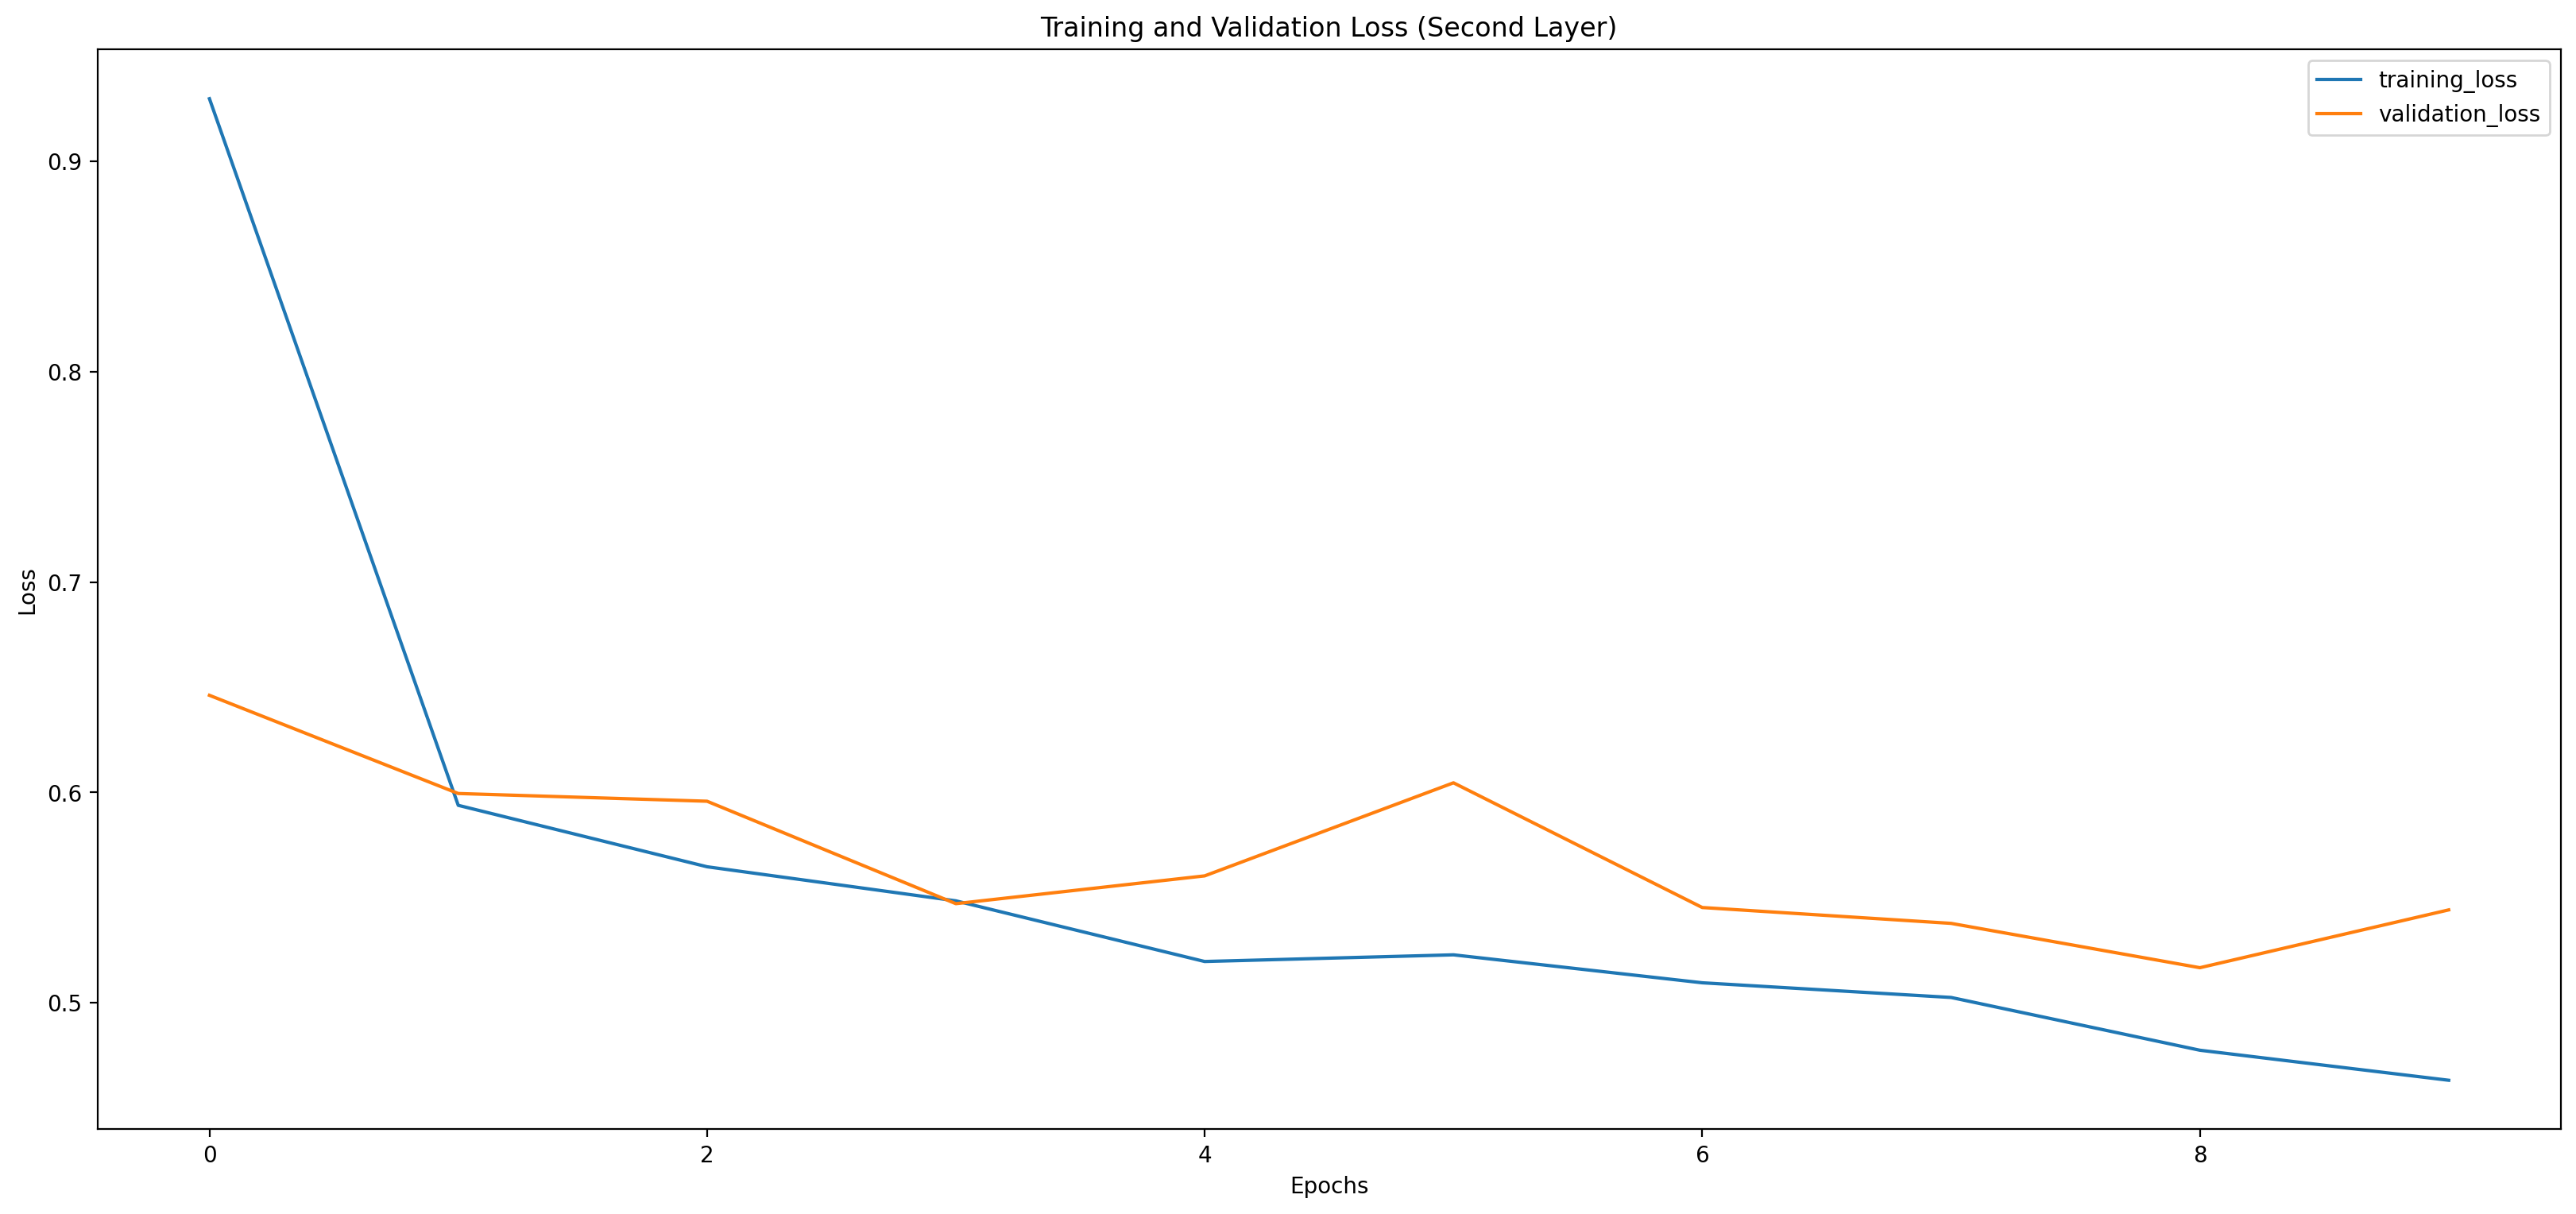

In [24]:
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (20,9))
plt.plot(history_df['loss'], label='training_loss')
plt.plot(history_df['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss (Second Layer)',fontsize='12')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

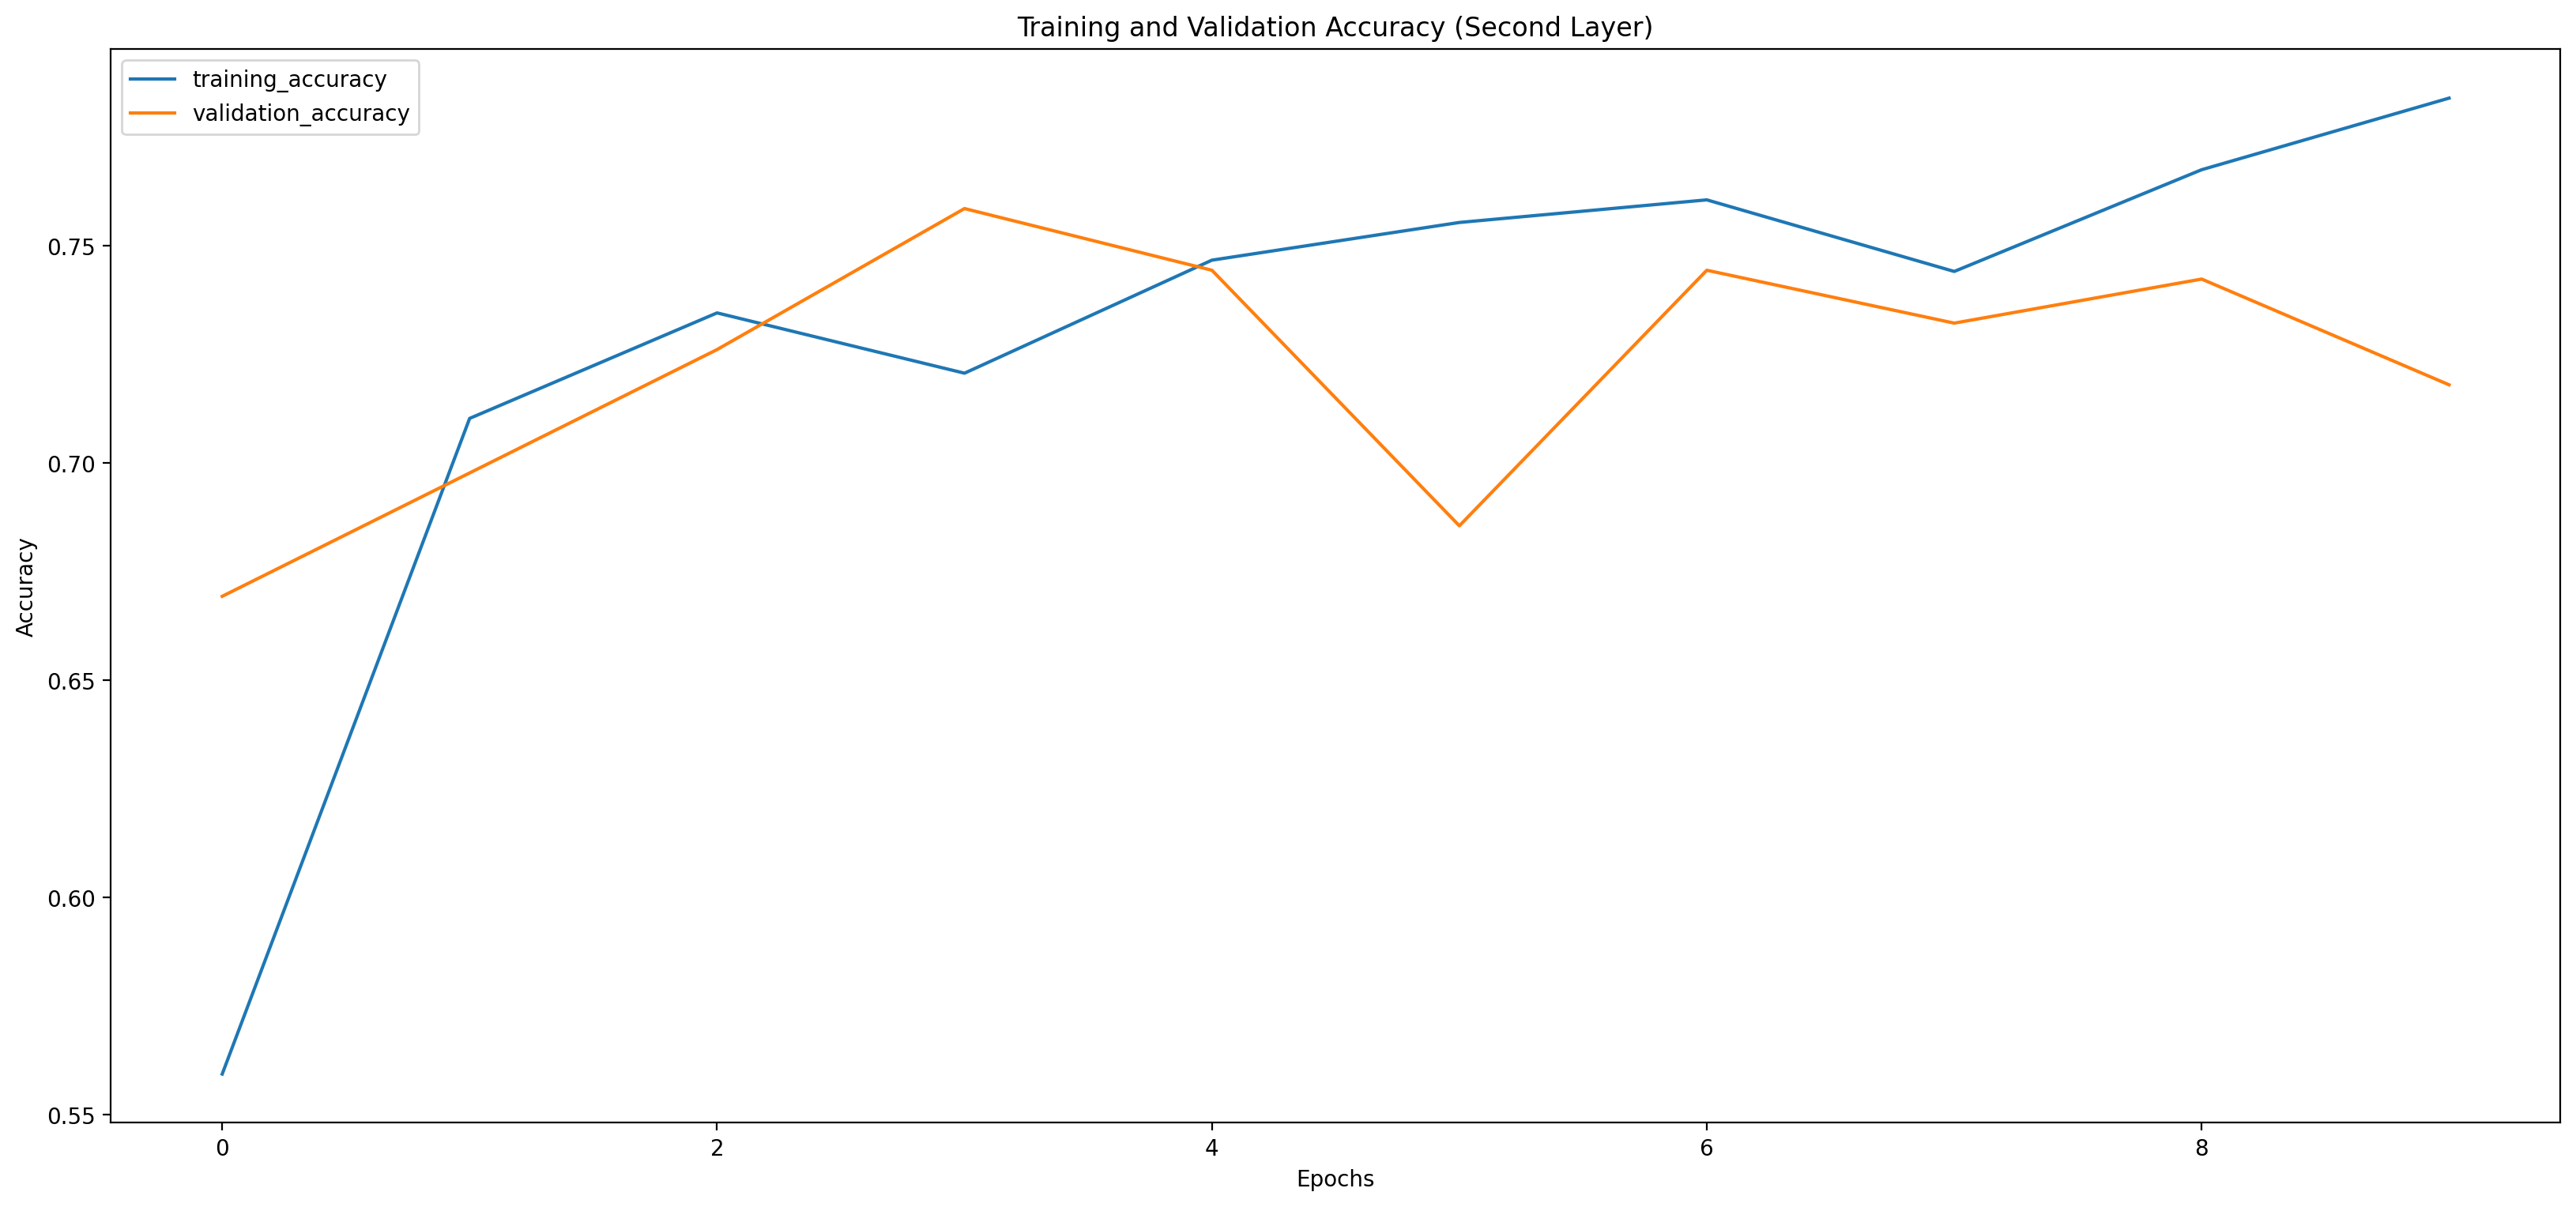

In [25]:
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (20,9))
plt.plot(history_df['accuracy'], label='training_accuracy')
plt.plot(history_df['val_accuracy'], label='validation_accuracy')
plt.title('Training and Validation Accuracy (Second Layer)',fontsize='12')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluation Stage

In [26]:
seq_model.evaluate(test_data_gen)

15/15 [==============================] - 17s 1s/step - loss: 0.5011 - accuracy: 0.7365


[0.5010935664176941, 0.7365438938140869]

In [27]:
preds=seq_model.predict(test_data_gen)

15/15 [==============================] - 21s 1s/step


<ipython-input-28-a9580ee04f37>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = (preds < 0.50).astype(np.int).tolist()


<Figure size 3000x4000 with 0 Axes>

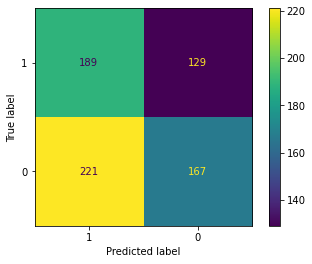

In [28]:
features = (preds < 0.50).astype(np.int).tolist()
features
emergency_predictions = []
for pred in features:
    for predictions in pred:
        emergency_predictions.append(predictions)
        
matrix_ = confusion_matrix(emergency_predictions, list((test_dataframe['emergency_or_not']).astype(int)))

plt.figure(dpi=200, figsize=(15,20))
conf_mat = ConfusionMatrixDisplay(matrix_, display_labels=test_dataframe.emergency_or_not.unique())
conf_mat.plot()

## STEP 3

### Constructor Stage

In [29]:
seq_model = Sequential()
seq_model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3),activation = 'relu', padding = 'same'))
seq_model.add(MaxPooling2D(pool_size=(2,2)))

seq_model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(224,224,3),activation='relu',padding='valid'))
seq_model.add(MaxPooling2D(pool_size=(2,2)))

seq_model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(224,224,3),activation='relu'))
seq_model.add(MaxPooling2D(pool_size=(2,2)))

seq_model.add(BatchNormalization())

seq_model.add(Flatten())

seq_model.add(Dense(50, activation = 'relu'))
seq_model.add(Dropout (0,2))
seq_model.add(Dense(1, activation = 'sigmoid'))

### Compilation Stage

In [30]:
#transforming the simple sequence layers
seq_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
seq_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 53, 53, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 32)      

### Training Stage

In [31]:
history=seq_model.fit(train_data_gen, epochs = 10, validation_data = validation_data_gen)

Epoch 1/10
24/24 [==============================] - 74s 3s/step - loss: 0.7055 - accuracy: 0.6357 - val_loss: 0.6730 - val_accuracy: 0.6126
Epoch 2/10
24/24 [==============================] - 69s 3s/step - loss: 0.5372 - accuracy: 0.7320 - val_loss: 0.6418 - val_accuracy: 0.6065
Epoch 3/10
24/24 [==============================] - 68s 3s/step - loss: 0.5242 - accuracy: 0.7615 - val_loss: 0.6562 - val_accuracy: 0.6268
Epoch 4/10
24/24 [==============================] - 88s 4s/step - loss: 0.5048 - accuracy: 0.7546 - val_loss: 0.6599 - val_accuracy: 0.6491
Epoch 5/10
24/24 [==============================] - 69s 3s/step - loss: 0.4751 - accuracy: 0.7745 - val_loss: 0.6283 - val_accuracy: 0.6308
Epoch 6/10
24/24 [==============================] - 67s 3s/step - loss: 0.4731 - accuracy: 0.7745 - val_loss: 0.6171 - val_accuracy: 0.7160
Epoch 7/10
24/24 [==============================] - 68s 3s/step - loss: 0.4398 - accuracy: 0.8014 - val_loss: 0.6371 - val_accuracy: 0.6511
Epoch 8/10
24/24 [==

### Checking Overfitting

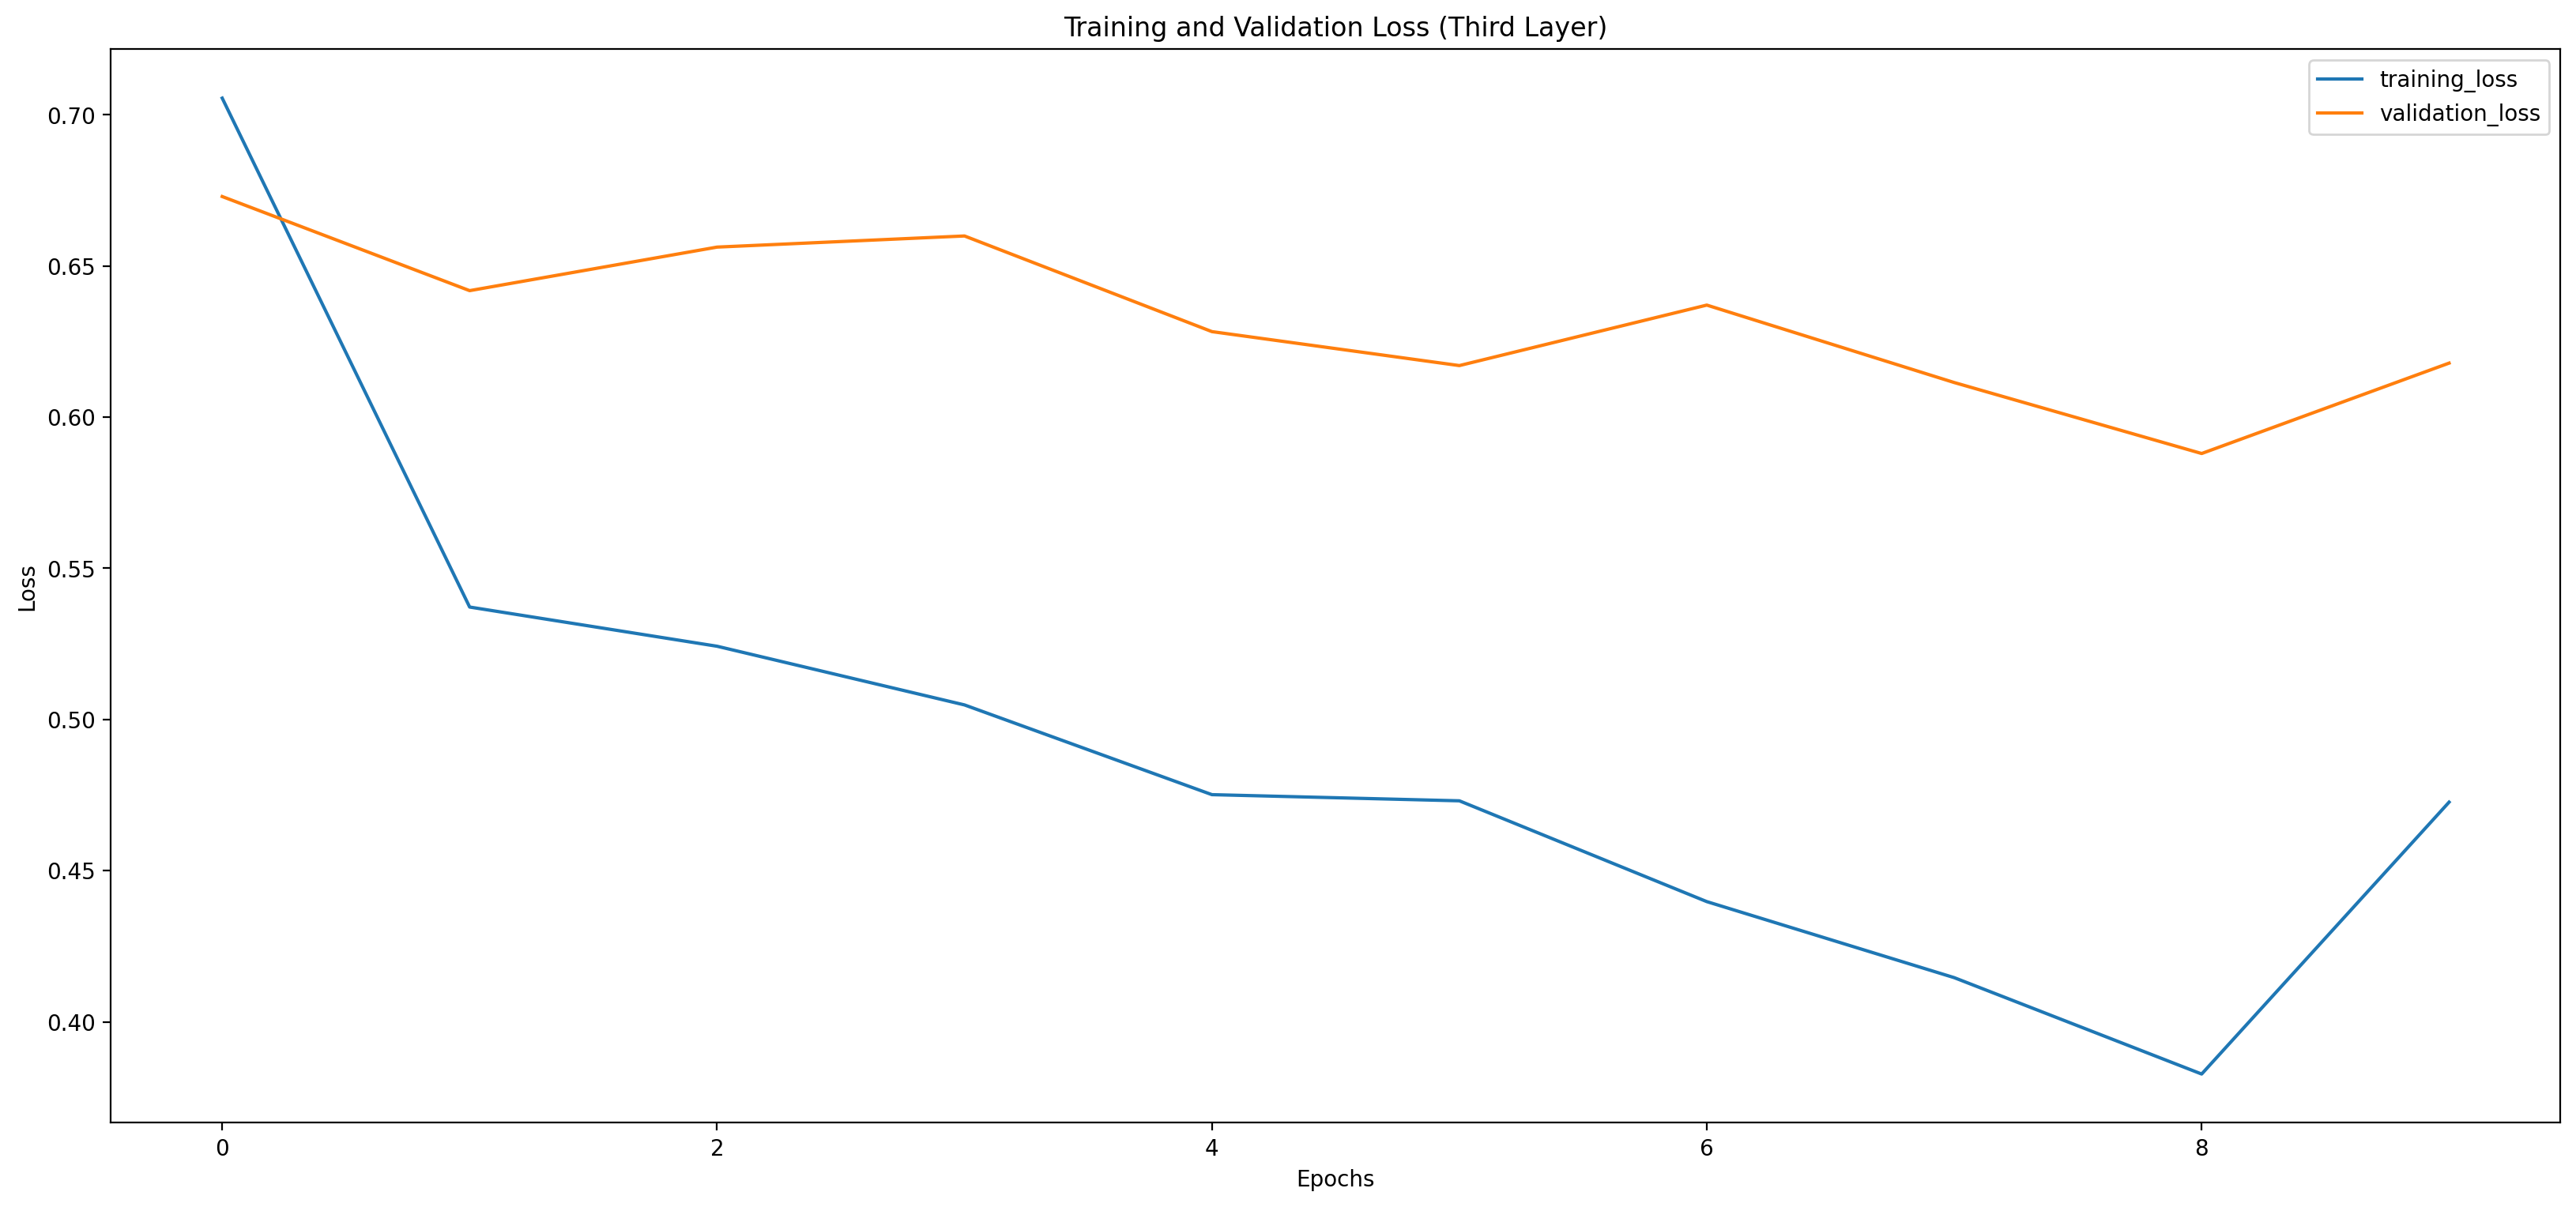

In [32]:
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (20,9))
plt.plot(history_df['loss'], label='training_loss')
plt.plot(history_df['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss (Third Layer)',fontsize='12')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

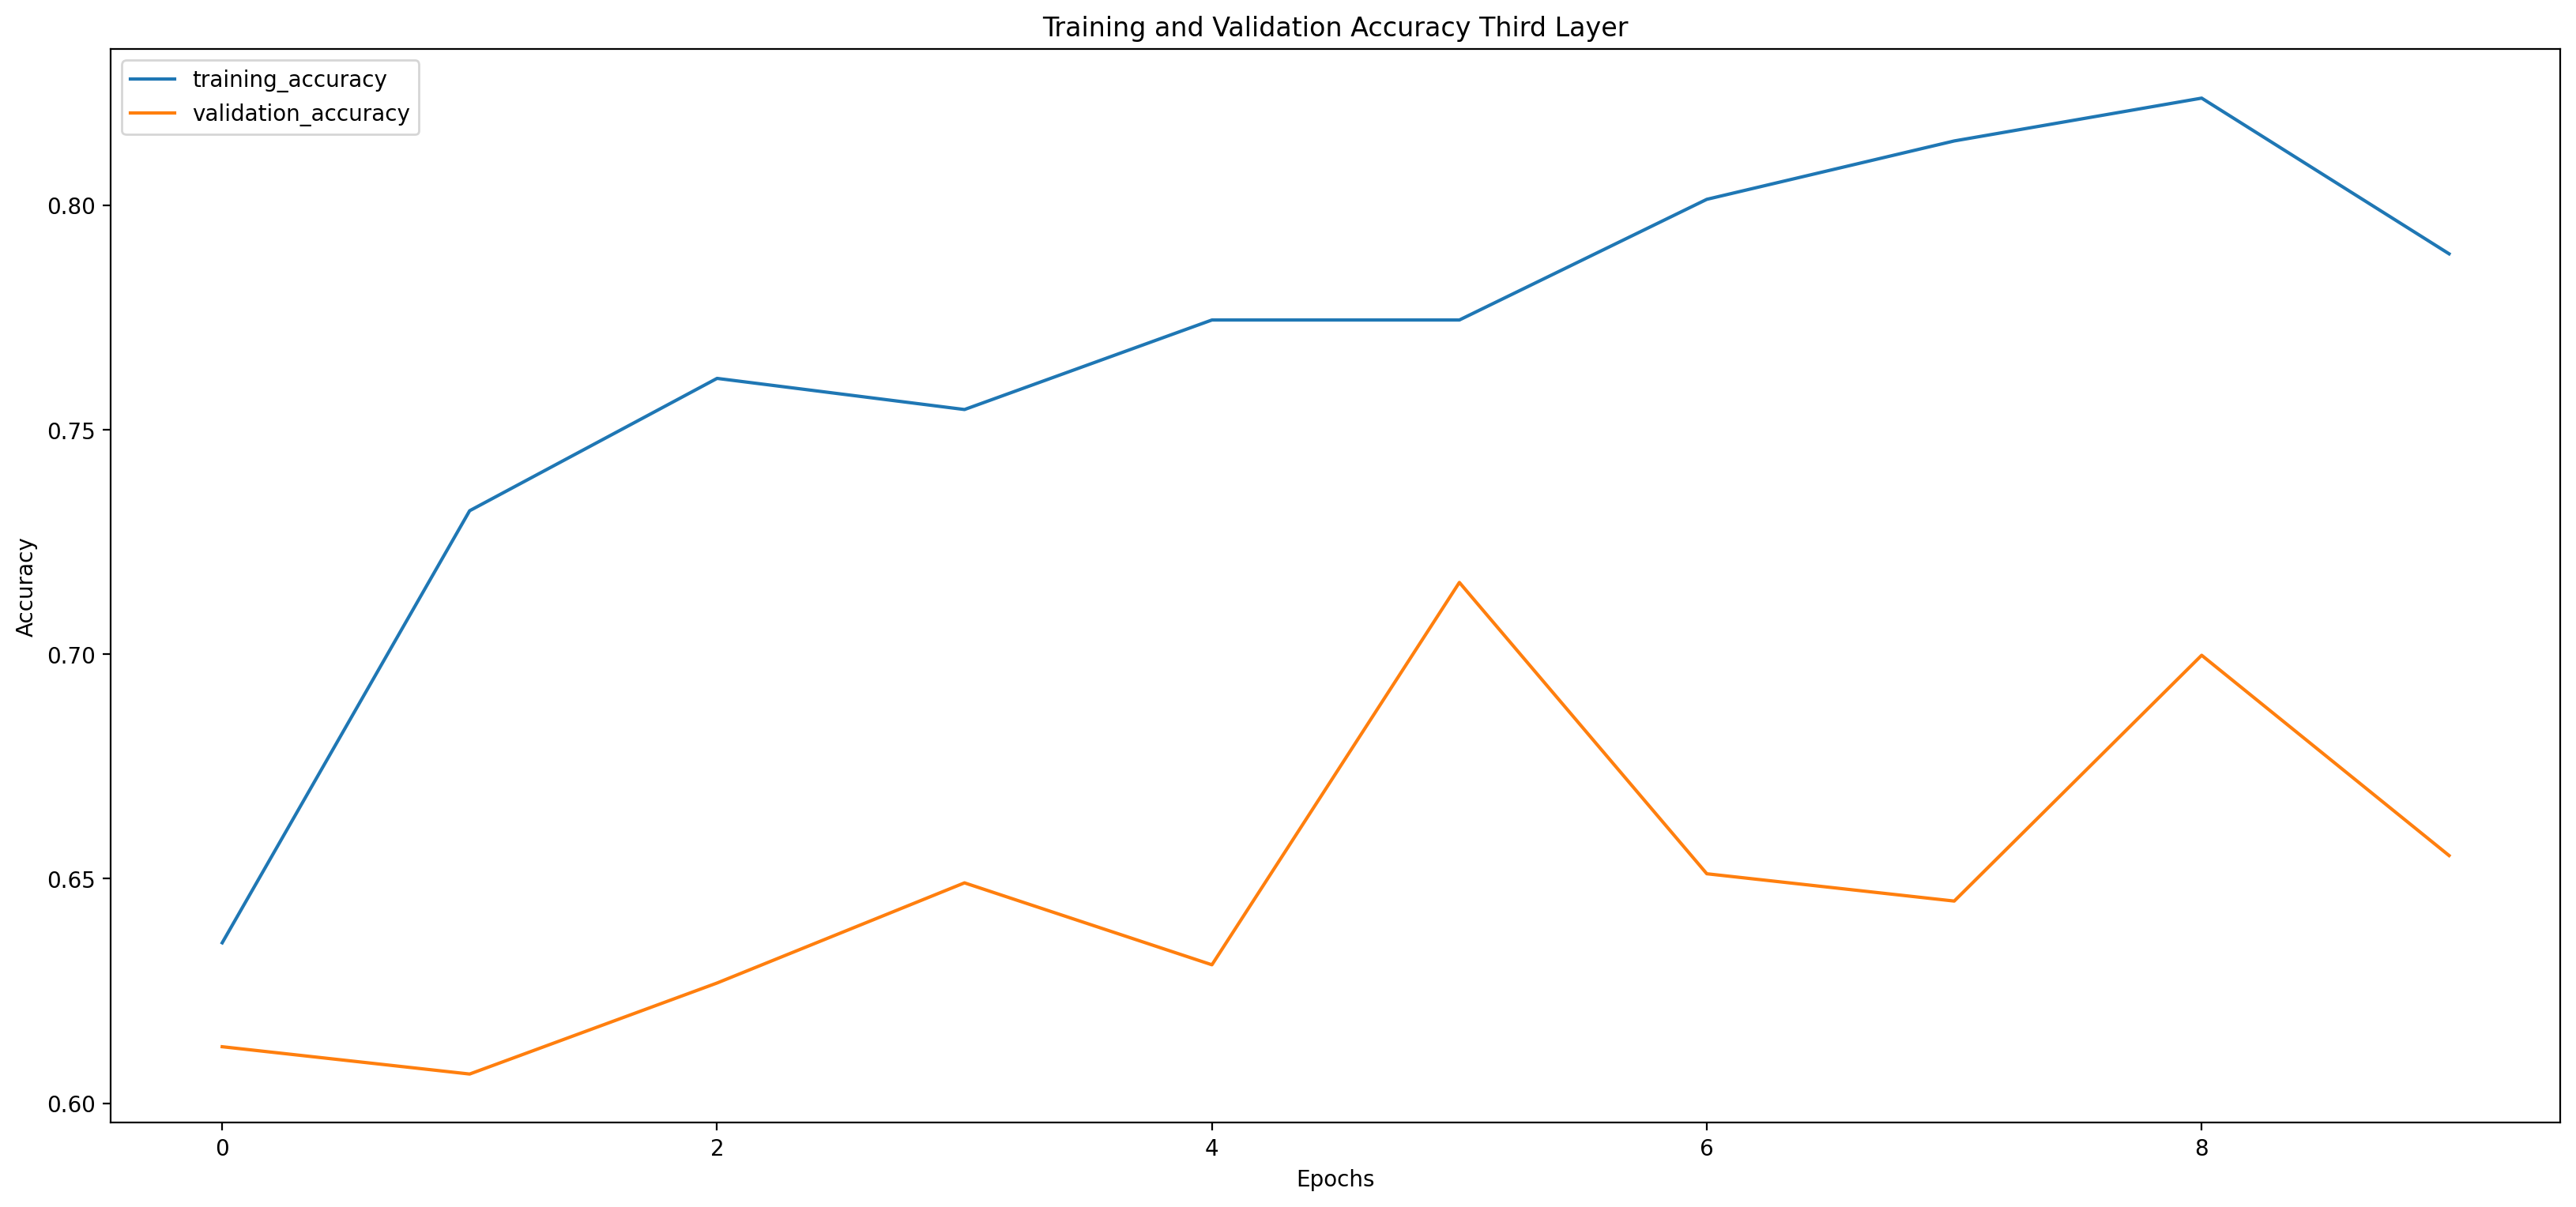

In [33]:
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (20,9))
plt.plot(history_df['accuracy'], label='training_accuracy')
plt.plot(history_df['val_accuracy'], label='validation_accuracy')
plt.title('Training and Validation Accuracy Third Layer',fontsize='12')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluation Stage

In [34]:
seq_model.evaluate(test_data_gen)

15/15 [==============================] - 23s 2s/step - loss: 0.6248 - accuracy: 0.6445


[0.6247854232788086, 0.6444759368896484]

In [35]:
preds = seq_model.predict(test_data_gen)

15/15 [==============================] - 20s 1s/step


<ipython-input-36-a9580ee04f37>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = (preds < 0.50).astype(np.int).tolist()


<Figure size 3000x4000 with 0 Axes>

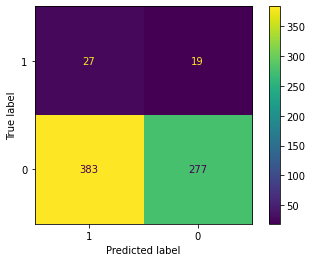

In [36]:
features = (preds < 0.50).astype(np.int).tolist()
features
emergency_predictions = []
for pred in features:
    for predictions in pred:
        emergency_predictions.append(predictions)
        
matrix_ = confusion_matrix(emergency_predictions, list((test_dataframe['emergency_or_not']).astype(int)))

plt.figure(dpi=200, figsize=(15,20))
conf_mat = ConfusionMatrixDisplay(matrix_, display_labels=test_dataframe.emergency_or_not.unique())
conf_mat.plot()